<h1><center>Data Analytics</h1>
<h2><center>Homework 1</h2>
<h3><center>Name: 李權桓   &emsp;   ID:10546004</h3>

### q1
Let $p=\frac{1}{4}$ as students  correctly answer multiple-choice questions.
So, 
$$
P(X=4)+P(X=5)=\begin{pmatrix}  
5 \\
4
\end{pmatrix}
p^{4}(1-p)^1 + 
\begin{pmatrix}  
5 \\
5
\end{pmatrix}
p^{5}(1-p)^0 $$

In [1]:
#q1 
p = .25
5*p**4*(1-p) + p**5

0.015625

### q2
Both side win and lose is $p=.5$. 
the expectation for win one game is $\frac{1}{p}=2$
If one time need to win 4 games in order to get champion, each game is independent.
$$\frac{1}{p} + \frac{1}{p} + \frac{1}{p} + \frac{1}{p} = 8 $$ 


### q3
The fountain show starts every 80 mins and I can wait 20 mins for the show. So, the time will be uniform distribution.
The probability is,
$$P=\frac{20}{80}=\frac{1}{4}$$

### q4a
Mary enters at 8h10 and John still there means clerk 1 have been processing John's work at least 10 mins
$$P(x>10) = 1 - (1- e^ {-10 \mu_1} ) = e^ {-10 \mu_1} $$

### q4b
According to Memoryless property, John finish time doesn't take history into account. Only present matters. So,
\begin{aligned}
P(x_1 > x_2) 
&= \int^\infty_0 P\lbrace x_1 > x_2 | x_1 =x \rbrace \lambda_1 e^{-\lambda_1 x} \\
&= \int^\infty_0 P\lbrace x > x_2 \rbrace \lambda_1 e^{-\lambda_1 x} \\
&= \int^\infty_0 (1- e^{-\lambda_2 x}) \lambda_1 e^{-\lambda_1 x} \\
&= 1- \frac{\lambda_1}{\lambda_1 + \lambda_2} \\
&= \frac{\mu_2}{\mu_1+\mu_2}
\end{aligned}

### q5
The train delay 1st row of matrix is delay min and 2 row is probability,
$$
\begin{vmatrix}
4 & 6 & 8 & 10 & 12 \\
\frac{1}{16} & \frac{1}{8} & \frac{1}{2} & \frac{1}{4} & \frac{1}{16}
\end{vmatrix}
$$

The bus delay is Normal Distribution which means the delay probability should take train delay as influence factor. 
It will need to consider if bus arrive earier than train probability and bus arrive after 8h20. 
$$Probability * (Probability \; of \; bus \; arrive \; before \; train + Probability \; of \; bus \; arrive \; after \; 8h20)$$
 
Note: $Probability \; of \; bus \; arrive \; after \; 8h20) = .5$ becasue is Normal distribution $\mu$


In [2]:
### q5
from scipy.stats import norm
(norm.cdf(14 , 20 , 2) + .5 ) * 1/16 + (norm.cdf(16 , 20 , 2) + .5 ) * 1/8 + \
    (norm.cdf(18 , 20 , 2) + .5 ) * 1/2 + (norm.cdf(20 , 20 , 2) + .5 ) * 1/4+  1/16


0.7385057620862279

### q6
The Probability of cancer $P(C)=\frac{1}{100}$, the probability dectect positive given somebody have cancer $P(D|C)=\frac{99}{100}$
According to Bayes' Theorem,
$$
\begin{aligned}
P(C|D) &= \frac{P(C \cap D)}{P(D)}
&= \frac{P(D|C)P(C)}{P(D|C)P(C) + P(D|C^\prime)P(C^\prime)}
\end{aligned}
$$


In [3]:
# q6a

pc=.01
pdc=.99
(pdc*pc)/(pdc*pc+(1-pdc)*(1-pc))

0.4999999999999997

In [4]:
# q6b

pc=.01
pdc=.999
(pdc*pc)/(pdc*pc+(1-pdc)*(1-pc))

0.9098360655737704

### q7
CLT:
$$
Z = \frac{\bar{x} - \mu }{ \frac{\sigma}{\sqrt{n} } }
$$

a) less than 10 mins: $Z = \frac{10 - 8.5 }{ \frac{3.5}{\sqrt{49} } }$

In [5]:
# q7a
import numpy as np
from scipy.stats import norm
mu = 8.5
sigma = 3.5
n=49
z = (10- mu)/ (sigma /np.sqrt(n))
norm.cdf(z)

0.9986501019683699

In [6]:
# q7b

z1 = (10- mu)/ (sigma /np.sqrt(n))
z2 = (7- mu)/ (sigma /np.sqrt(n))
norm.cdf(z1) - norm.cdf(z2)

0.9973002039367398

In [7]:
#q7c

z = (7.5- mu)/ (sigma /np.sqrt(n))
norm.cdf(z)

0.022750131948179195

### q8
The test statistic value:
$$
Z = \frac{\hat{p} - p_0 }{ \sqrt{\frac{p (1-p)}{n} } }
$$

In [8]:
# q8
import numpy as np
from scipy.stats import norm
p = .4
n= 600
r1 = 216
r2 = 264
z1 = (r1/n- p)/ (np.sqrt(p*(1-p)/n))
z2 = (r2/n- p)/ (np.sqrt(p*(1-p)/n))
norm.cdf(z2) - norm.cdf(z1)

0.9544997361036416

### q9

In [9]:
 # q9
from scipy.stats import binom
import pandas as pd

obs = pd.Series([39 , 23, 12, 1])
n = 24
ss = 75

xbar = (obs[0]*0 + obs[1]*1 + obs[2]*2 + obs[3]*3)/ss
phat = xbar/n

exp = pd.Series()
for i in range(0,4):
    exp.at[i] = ss * binom.pmf(i , n , phat)
print(exp) 

print(phat)

0    38.144709
1    26.156372
2     8.594237
3     1.800697
dtype: float64
0.027777777777777776


/tmp/ipykernel_1829/425235944.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  exp = pd.Series()


In [10]:
chi = 0
for i in range(0,4):
    tmp = (obs[i]-exp[i])**2 / exp[i]
    print('when i is ', i , 'tmp = ', tmp)
    chi = chi + tmp 
print(chi)

when i is  0 tmp =  0.019177553372751635
when i is  1 tmp =  0.3808893949356095
when i is  2 tmp =  1.3496515570903822
when i is  3 tmp =  0.3560376400292312
2.1057561454279745


In [11]:
from scipy.stats import chi2
val = chi2.ppf(.95,2)
print('Q9: The test statistic value=', val)
if chi < val:
     print( 'Do not reject H_0')
else:
    print('Reject H_0')

Q9: The test statistic value= 5.991464547107979
Do not reject H_0


### q10

In [12]:
# q10
import numpy as np
a = np.array([[24, 11, 10], [7, 13, 5], [4, 6, 20]]) # observers
obs = a.reshape((3,3))
a_prob = a/100
r_sum = a_prob.sum(axis=1)
c_sum = a_prob.sum(axis=0)

r_mat = r_sum.repeat(3,axis=0).reshape((3,3))
c_mat = c_sum.repeat(3,axis=0).reshape((3,3)).T # do transpose
exp = r_mat * c_mat *100 # expeted matrix
exp

array([[15.75, 13.5 , 15.75],
       [ 8.75,  7.5 ,  8.75],
       [10.5 ,  9.  , 10.5 ]])

In [13]:
chi = 0
for i in range(c_mat.shape[0]):
    for j in range(c_mat.shape[1]):
        tmp = (obs[i][j] - exp[i][j])**2 / exp[i][j]
        chi = chi + tmp
chi

26.493121693121697

In [17]:

from scipy.stats import chi2
val = chi2.ppf(.99,4)
print('Q10: The test statistic value=', val)
if chi < val:
     print( 'Do not reject H_0')
else:
    print('Reject H_0')

Q10: The test statistic value= 13.276704135987622
Reject H_0


### q11

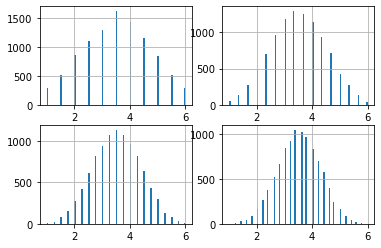

In [10]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dices = np.array([2,3,4,5])
data = []

# this might something wrong
for i in dices:
    result = []
    for j in range(10000):
        tmp = random.choices(range(1,7),k = i)
        tmp = np.array(tmp).sum()/i # average
        result.append(tmp)
    data.append(result)


fig, ax = plt.subplots(2, 2)

for i in range(dices.size):
    plt.subplot(2,2,i+1)
    pd.Series(data[i]).hist(bins=100)

### Q12

In [52]:
# q12

def card_steps(data, x):
    steps = 0
    tmp = []
    while x < data.__len__():
        tmp.append(x)
        steps = data[x]
        x = x + steps
    return tmp



51

In [53]:

num_list = [5 if y == 11 or y== 12 or y== 13 else y for y in range(1,14)]
a = num_list*4 
data = random.sample(a,52)


In [54]:
import pandas as pd
output = pd.DataFrame()
for i in range(50):
    output.append( card_steps(data, 10)[-1])


In [77]:

t= pd.DataFrame([1,2,3]).append([3,4,5],ignore_index=True)
t.value_counts

<bound method DataFrame.value_counts of    0
0  1
1  2
2  3
3  3
4  4
5  5>

In [71]:
t.groupby(by='0').count

KeyError: '0'